# Tabular Anonymization


## Installation

In [ ]:
!pip install cape-privacy==0.3.0 --no-deps

     |████████████████████████████████| 48 kB 2.6 MB/s 


In [ ]:
!pip install anonympy

     |████████████████████████████████| 1.2 MB 5.5 MB/s 
     |████████████████████████████████| 2.0 MB 36.4 MB/s 
  Created wheel for anonympy: filename=anonympy-0.2.0-py3-none-any.whl size=18002 sha256=b677293349ef2bdfc82df7bc7f8c5ed65a4ff2c6362a5061f9824aa91622be2b
  Stored in directory: /root/.cache/pip/wheels/17/51/e9/c15f43cb193c105f99d8c5e2383338a9e364a641174d0a99ff
Successfully built anonympy
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cape-privacy 0.3.0 requires numpy==1.18.1, but you have numpy 1.19.5 which is incompatible.
cape-privacy 0.3.0 requires pandas==1.0.3, but you have pandas 1.1.5 which is incompatible.
cape-privacy 0.3.0 requires pycryptodome==3.9.8, but you have pycryptodome 3.12.0 which is incompatible.
cape-privacy 0.3.0 requires pyyaml==5.3.1, but you have pyyaml 3.13 which is incompatible.
cape-privacy 0.3.0 requires validators==0

## Importing and Initializing

In [ ]:
from anonympy.pandas import dfAnonymizer
from anonympy.pandas.utils_pandaspandas import load_dataset

In [ ]:
# specify datettime columns
df = load_dataset('big')

anonym = dfAnonymizer(df)

anonym

+-------------------------------+
|  Total number of columns: 9   |
+===============================+
| Anonymized Column -> Method:  |
+-------------------------------+
| Unanonymized Columns:         |
| - first_name                  |
| - address                     |
| - city                        |
| - phone                       |
| - email                       |
| - web                         |
| - salary                      |
| - birthdate                   |
| - age                         |
+-------------------------------+

<p>So, we have got <strong>10 columns</strong>. None of them are yet anonymized</p>

## Check dtypes

<p>Since anonymization methods depend on data type, it's recommended to check each column data type before applying any functions  </p>

In [ ]:
print('Rows:', df.shape[0],'\nColumns:', df.shape[1])
df.head()

Rows: 500 
Columns: 10


,first_name,address,city,postal,phone,email,web,salary,birthdate,age
0,Aleshia,14 Taylor St,St. Stephens Ward,CT2 7PP,01835-703597,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,46391,2000-12-23 15:09:18.117475200,21
1,Evan,5 Binney St,Abbey Ward,HP11 2AX,01937-864715,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,30798,2004-04-22 04:09:51.325948800,17
2,France,8 Moor Place,East Southbourne and Tuckton W,BH6 3BE,01347-368222,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,32384,2002-01-21 18:56:29.090025600,19
3,Ulysses,505 Exeter Rd,Hawerby cum Beesby,DN36 5RP,01912-771311,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,39298,2000-11-24 21:59:48.621840000,21
4,Tyisha,5396 Forth Street,Greets Green and Lyng Ward,B70 9DT,01547-429341,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,41630,1998-06-23 05:19:37.687008000,23


In [ ]:
print('Categorical Columns: ', anonym.categorical_columns)
print('Numeric Columns: ', anonym.numeric_columns)
print('Datetime Columns: ', anonym.datetime_columns)

print('\nOr Call `info` method\n ')

anonym.info()

Categorical Columns:  ['first_name', 'address', 'city', 'postal', 'phone', 'email', 'web']
Numeric Columns:  ['salary', 'age']
Datetime Columns:  ['birthdate']

Or Call `info` method
 
+------------+--------+-------------+--------+
|   Column   | Status |    Type     | Method |
+============+========+=============+========+
| first_name | 0      | categorical |        |
+------------+--------+-------------+--------+
| address    | 0      | categorical |        |
+------------+--------+-------------+--------+
| city       | 0      | categorical |        |
+------------+--------+-------------+--------+
| postal     | 0      | categorical |        |
+------------+--------+-------------+--------+
| phone      | 0      | categorical |        |
+------------+--------+-------------+--------+
| email      | 0      | categorical |        |
+------------+--------+-------------+--------+
| web        | 0      | categorical |        |
+------------+--------+-------------+--------+
| salary     | 0

<p>7 categorical, 2 numerical and 1 datetime columns. 
Let's see what methods we can apply to categorical columns.
<br>List of available methods: <code>anonympy.pandas.utils.available_methods</code>
</p>

In [ ]:
from anonympy.pandas.utils_pandas import available_methods

In [ ]:
available_methods('categorical') # args: 'categorical' / 'numerical' / 'datetime' / 'general' / None

categorical_fake	categorical_fake_auto	categorical_resampling	categorical_tokenization	categorical_email_masking


## Categorical Email Masking

<p>To apply partial email masking call <code>categorical_email_masking</code> on corresponding column</p>

In [ ]:
anonym.categorical_email_masking(columns='email', inplace = False)

0         a*****z@hotmail.com
1           e*****s@gmail.com
2         f*****e@hotmail.com
3         u*****s@hotmail.com
4         t*****s@hotmail.com
                ...          
495        a*****y@veit.co.uk
496     r*****i@euresti.co.uk
497    c*****g@brenning.co.uk
498         c*****y@gmail.com
499       m*****i@hotmail.com
Name: email, Length: 500, dtype: object

`inplace=True` (default) - changes will be applied to the dataframe. Access using `anonym.to_df()`
<br>
`inplace = False` - return the changes

In [ ]:
anonym.categorical_email_masking('email') # inplace = True

print(anonym.anonymized_columns, '\n')

print(anonym)

['email'] 

+-------------------------------+
|  Total number of columns: 10  |
+===============================+
| Anonymized Column -> Method:  |
| - email -> Partial Masking    |
+-------------------------------+
| Unanonymized Columns:         |
| - first_name                  |
| - address                     |
| - city                        |
| - postal                      |
| - phone                       |
| - web                         |
| - salary                      |
| - birthdate                   |
| - age                         |
+-------------------------------+


Now **email** column appears to be anonymized

## Categorical Synthetic data (fake data) 
<p>Next, let's replace some values with synthetically generated ones. 
<br>If column name is same as the corresponding faker's method, use <strong>categorical_fake_auto</strong> method.
<br>List of faker's methods: <code>anonympy.pandas.utils.fake_methods</code>
</p>

In [ ]:
from anonympy.pandas.utils_pandas import fake_methods

In [ ]:
fake_methods() # args: letter / None/ 'all'
# output in the following screenshot

A | aba, address, administrative_unit, am_pm, android_platform_token, ascii_company_email, ascii_email, ascii_free_email, ascii_safe_email
B | bank_country, bban, boolean, bothify, bs, building_number
C | cache_pattern, catch_phrase, century, chrome, city, city_prefix, city_suffix, color, color_name, company, company_email, company_suffix, coordinate, country, country_calling_code, country_code, credit_card_expire, credit_card_full, credit_card_number, credit_card_provider, credit_card_security_code, cryptocurrency, cryptocurrency_code, cryptocurrency_name, csv, currency, currency_code, currency_name, currency_symbol, current_country, current_country_code
D | date, date_between, date_between_dates, date_object, date_of_birth, date_this_century, date_this_decade, date_this_month, date_this_year, date_time, date_time_ad, date_time_between, date_time_between_dates, date_time_this_century, date_time_this_decade, date_time_this_month, date_time_this_year, day_of_month, day_of_week, del_argu

As we can see from this list, column names: **address**, **city** and **first_name** correspond to faker's methods. So we can run `categorical_fake_auto` and it will anonymize these 3 columns
* `email` method is also there, but since we already anonymized it, it won't get affected.

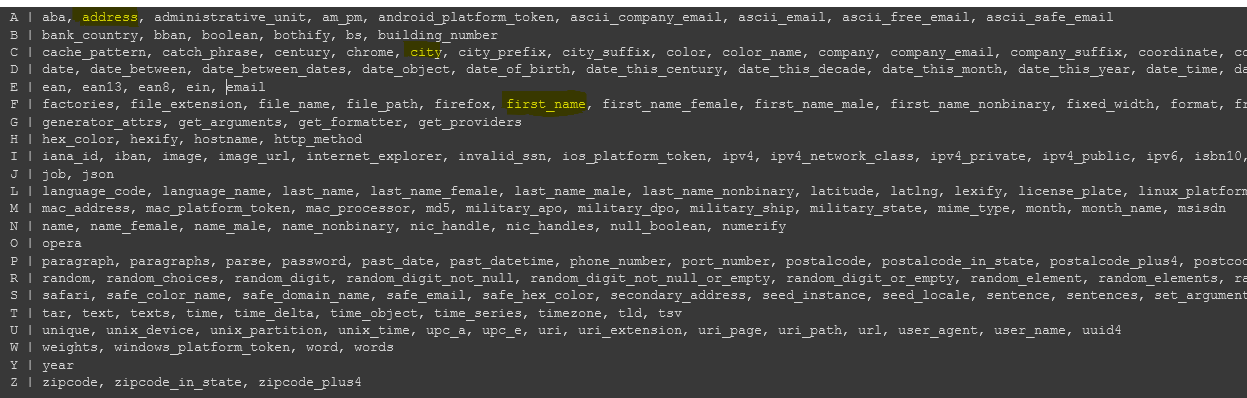

In [ ]:
anonym.categorical_fake_auto() # default args: locale='en_US', inplace=True

# we could use `categorical_fake` method as well, with specifiying the columns
# anonym.categorical_fake(['first_name', 'address', 'city'])

print(anonym)

`email` column already anonymized!
+--------------------------------+
|  Total number of columns: 10   |
+================================+
| Anonymized Column -> Method:   |
| - email -> Partial Masking     |
| - first_name -> Synthetic Data |
| - address -> Synthetic Data    |
| - city -> Synthetic Data       |
+--------------------------------+
| Unanonymized Columns:          |
| - postal                       |
| - phone                        |
| - web                          |
| - salary                       |
| - birthdate                    |
| - age                          |
+--------------------------------+


Let's call `fake_methods` for letter 'u'

In [ ]:
fake_methods('u')

 unique, unix_device, unix_partition, unix_time, upc_a, upc_e, uri, uri_extension, uri_page, uri_path, url, user_agent, user_name, uuid4


In our dataframe '**web**' column column stored different **urls**. So we can use `url` method on '**web**' column. 

And column '**phone**' values can be replaced using `phone_number` method

Let's apply these changes using `categorical_fake` method which accepts list of column names (if similar to method name) or a dictionary (when names differ)

In [ ]:
anonym.categorical_fake({'web':'url', 'phone': 'phone_number'}) # inplace = True

anonym.info()

+------------+--------+-------------+-----------------+
|   Column   | Status |    Type     |     Method      |
+============+========+=============+=================+
| first_name | 1      | categorical | Synthetic Data  |
+------------+--------+-------------+-----------------+
| address    | 1      | categorical | Synthetic Data  |
+------------+--------+-------------+-----------------+
| city       | 1      | categorical | Synthetic Data  |
+------------+--------+-------------+-----------------+
| postal     | 0      | categorical |                 |
+------------+--------+-------------+-----------------+
| phone      | 1      | categorical | Synthetic Data  |
+------------+--------+-------------+-----------------+
| email      | 1      | categorical | Partial Masking |
+------------+--------+-------------+-----------------+
| web        | 1      | categorical | Synthetic Data  |
+------------+--------+-------------+-----------------+
| salary     | 0      | numeric     |           

## Categorical Tokenization


Let's apply tokenization on '**postal**' column

In [ ]:
print(anonym.categorical_tokenization('postal', inplace = False)) # first inplace = False, to see how the changes will look

anonym.categorical_tokenization('postal') # inplace = True, by default

0      2a8ba32381
1      1569763104
2      73c0b907be
3      b155a02362
4      56a6b1e03a
          ...    
495    7687741a49
496    6a16bbf755
497    bedd62bb14
498    30dae3be6e
499    7c49b8248b
Name: postal, Length: 500, dtype: object


In [ ]:
# which columns are left unanonymized? 
print(anonym.unanonymized_columns)

['salary', 'birthdate', 'age']


## Datetime Perturbation (noise)

Let's add some random noise to '**birthdate**' column
<br>Also, we should specify to add noise only to days and month but not year.

In [ ]:
print(anonym.datetime_noise('birthdate', frequency=('MONTH', 'DAY'), inplace = False), '\n') # inplace = False to observe the changes

print(df.birthdate) # for comparison

0     2000-03-30 15:09:18.117475200
1     2004-05-18 04:09:51.325948800
2     2002-07-15 18:56:29.090025600
3     2000-11-19 21:59:48.621840000
4     1998-05-20 05:19:37.687008000
                   ...             
495   1994-09-15 16:40:58.379318400
496   1998-11-08 11:23:56.188204800
497   1998-06-12 22:03:29.331331200
498   1995-02-15 21:48:38.237414400
499   2000-10-12 20:38:06.739699200
Name: birthdate, Length: 500, dtype: datetime64[ns] 

0     2000-12-23 15:09:18.117475200
1     2004-04-22 04:09:51.325948800
2     2002-01-21 18:56:29.090025600
3     2000-11-24 21:59:48.621840000
4     1998-06-23 05:19:37.687008000
                   ...             
495   1995-06-08 16:40:58.379318400
496   1999-02-10 11:23:56.188204800
497   1998-01-13 22:03:29.331331200
498   1994-12-20 21:48:38.237414400
499   2000-02-13 20:38:06.739699200
Name: birthdate, Length: 500, dtype: datetime64[ns]


In [ ]:
anonym.datetime_noise('birthdate', frequency=('MONTH', 'DAY')) # inplace=True, to apply the changes

In [ ]:
anonym.info()

+------------+--------+-------------+-----------------------+
|   Column   | Status |    Type     |        Method         |
+============+========+=============+=======================+
| first_name | 1      | categorical | Synthetic Data        |
+------------+--------+-------------+-----------------------+
| address    | 1      | categorical | Synthetic Data        |
+------------+--------+-------------+-----------------------+
| city       | 1      | categorical | Synthetic Data        |
+------------+--------+-------------+-----------------------+
| postal     | 1      | categorical | Tokenization          |
+------------+--------+-------------+-----------------------+
| phone      | 1      | categorical | Synthetic Data        |
+------------+--------+-------------+-----------------------+
| email      | 1      | categorical | Partial Masking       |
+------------+--------+-------------+-----------------------+
| web        | 1      | categorical | Synthetic Data        |
+-------

Two numeric columns: '**salary**' and '**age**' are left

## Numeric Rounding 

Applying `numeric_rounding` to '**salary**' column

In [ ]:
print(df.salary, '\n') # original
anonym.numeric_rounding('salary', inplace = False) # see the changes

0      46391
1      30798
2      32384
3      39298
4      41630
       ...  
495    42239
496    42640
497    44982
498    32827
499    41266
Name: salary, Length: 500, dtype: int64 



0      50000
1      30000
2      30000
3      40000
4      40000
       ...  
495    40000
496    40000
497    40000
498    30000
499    40000
Name: salary, Length: 500, dtype: int64

In [ ]:
anonym.numeric_rounding('salary') # apply the changes

## Numeric Perturbation (noise)

 Some noise to '**age**' column would be nice

In [ ]:
print(df.age, '\n') # original

print(anonym.numeric_noise('age', inplace = False)) # observe the changes

0      21
1      17
2      19
3      21
4      23
       ..
495    26
496    22
497    23
498    27
499    21
Name: age, Length: 500, dtype: int64 

0      28
1      17
2      25
3      26
4      17
       ..
495    17
496    19
497    25
498    21
499    28
Length: 500, dtype: int64


In [ ]:
anonym.numeric_noise('age') # apply the changes

In [ ]:
anonym

+---------------------------------------+
|      Total number of columns: 10      |
+=======================================+
| Anonymized Column -> Method:          |
| - email -> Partial Masking            |
| - first_name -> Synthetic Data        |
| - address -> Synthetic Data           |
| - city -> Synthetic Data              |
| - web -> Synthetic Data               |
| - phone -> Synthetic Data             |
| - postal -> Tokenization              |
| - birthdate -> Datetime Perturbation  |
| - salary -> Generalization - Rounding |
| - age -> Numeric Perturbation         |
+---------------------------------------+
| Unanonymized Columns:                 |
|                                       |
+---------------------------------------+

All columns have been successfully anonymized, let's now compare both datasets before and after anonymization 

In [ ]:
df.head()

,first_name,address,city,postal,phone,email,web,salary,birthdate,age
0,Aleshia,14 Taylor St,St. Stephens Ward,CT2 7PP,01835-703597,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,46391,2000-12-23 15:09:18.117475200,21
1,Evan,5 Binney St,Abbey Ward,HP11 2AX,01937-864715,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,30798,2004-04-22 04:09:51.325948800,17
2,France,8 Moor Place,East Southbourne and Tuckton W,BH6 3BE,01347-368222,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,32384,2002-01-21 18:56:29.090025600,19
3,Ulysses,505 Exeter Rd,Hawerby cum Beesby,DN36 5RP,01912-771311,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,39298,2000-11-24 21:59:48.621840000,21
4,Tyisha,5396 Forth Street,Greets Green and Lyng Ward,B70 9DT,01547-429341,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,41630,1998-06-23 05:19:37.687008000,23


In [ ]:
anonym.to_df()

,first_name,address,city,postal,phone,email,web,salary,birthdate,age
0,Betty,"037 Anderson Branch Apt. 184\nPowellfurt, AL 5...",Annside,ac9296b7cd,+1-669-652-5362x575,a*****z@hotmail.com,http://wilson.com/,50000,2001-02-21 15:09:18.117475200,23
1,Dustin,"32977 Amy Shores\nNorth Jessicatown, WV 01498",North Andrew,3ed9f4641e,737-362-3685,e*****s@gmail.com,http://meyer.com/,30000,2004-02-26 04:09:51.325948800,8
2,Christopher,"7854 Nunez Cove\nHoodside, SC 05482",Hughesside,cc1f446ef9,+1-145-640-8718,f*****e@hotmail.com,http://cross.info/,30000,2001-08-28 18:56:29.090025600,15
3,Samuel,"7583 Heather Prairie\nScotthaven, AR 94542",West Ashley,bc69e5439a,(719)299-8553x6456,u*****s@hotmail.com,https://www.anderson.com/,40000,2000-12-25 21:59:48.621840000,21
4,Timothy,"929 Ellis Hills Apt. 766\nEast Elizabeth, MO 2...",Reesemouth,f1e506bf00,041.810.3076,t*****s@hotmail.com,https://www.shannon-thomas.net/,40000,1999-03-24 05:19:37.687008000,23
...,...,...,...,...,...,...,...,...,...,...
495,Natalie,"54840 Tate Summit Suite 754\nLake Amberbury, W...",Port Jacobstad,da31a1d471,001-170-972-2673x3215,a*****y@veit.co.uk,https://www.moore.com/,40000,1995-10-09 16:40:58.379318400,20
496,Jose,"847 Henson Pike Apt. 762\nPort Nicholashaven, ...",Peterport,11f990c971,127-355-3556x6363,r*****i@euresti.co.uk,http://perry.com/,40000,1999-06-12 11:23:56.188204800,17
497,Joanna,"942 Derek Orchard\nNew Dawntown, PA 88841",Port Dannyborough,33daacb57b,+1-048-563-2513x3377,c*****g@brenning.co.uk,http://www.bradley.com/,40000,1997-05-20 22:03:29.331331200,32
498,Karen,"50796 Karen Fall\nSouth Whitney, NY 24702",Brownview,76fbf0ca46,001-142-681-2195x7266,c*****y@gmail.com,https://www.carr.org/,30000,1994-02-23 21:48:38.237414400,27
